## Avocado Dataset 
Classification Type of Avocado using Logistic Regression and Random forest classifier

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Preprocessing](#section3) <br>
4. [Data Analysis](#section4) 
    - 4.1 [Spread of Average Price in the data](#section401)<br/>
    - 4.2 [Type of avocado vs Average price](#section402)<br/>
    - 4.3 [How Average price varies over years](#section403)<br/>
    - 4.4 [How Average price varies across regions](#section404)<br/>
5. [Classifying Type of Avocado ](#section5)
    - 5.1 [Using Logistic Regression](#section501)<br>
    - 5.2 [Model Evaluation for Logistic Regression](#section502)<br> 
    - 5.3 [Using Random forest classifier](#section503)<br>
    - 5.4 [Model Evaluation for Random forest classifier](#section504)<br> 
6. [Conclusion](#section7)<br>  


### 1. Problem Statement <a class="anchor" id="section1">

The goal is to __classify avocado__ based on type to either organic and conventional using classification algorithms

### 2. Data Loading and Description <a class="anchor" id="section2">

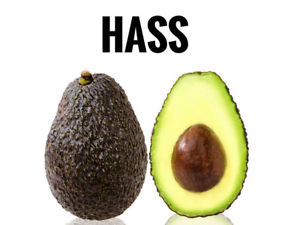

- The dataset consists of the information about HASS Avocado. Historical data on avocado prices and sales volume in multiple US markets. Various variables present in the dataset includes Date, AveragePrice,Total Volume, Total Bags,Year,Type etc. 
- The dataset comprises of __ 18249 observations of 14 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Unnamed   | SNo.                                        | 
| Date      | The date of the observation                         |  
| AveragePrice        | the average price of a single avocado                                     | 
| Total Volume          | Total number of avocados sold                                         |   
| 4046           | Total number of avocados with PLU 4046 sold                                       |
| 4225           | Total number of avocados with PLU 4225 sold                      |
| 4770         | Total number of avocados with PLU 4770 sold |
| Total Bags         |Total Number of Bags sold |
| Small Bags        | Total Number of Small Bags sold                                            |
| Large Bags          | Total Number of Large Bags sold                                         |
| XLarge Bags         | Total Number of XLarge Bags sold                                        |
| type        | Organic or Conventional                                            |
| year          | The year of observation                                           |
| region         | the city or region of the observation                                              |

#### Importing packages                                          

In [ ]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
#%matplotlib inline
sns.set()

from sklearn.preprocessing import LabelEncoder

from subprocess import check_output
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



#### Importing the Dataset

In [ ]:
import os
print(os.listdir("../input"))

data_path = "../input/"
avocado = pd.read_csv(data_path+"avocado.csv")
avocado.head()

## 3. Preprocessing the data <a class="anchor" id="section3">

 - Creating Dummy variables for __Type__ column
 - Use label encoder for __region__ column to convert it into numerical data
 - Dropping the column __Unnamed__ as it has only index values.
 - Renaming column 4046,4225,4770 for better understanding    

In [ ]:
avocado.shape

18249 rows with 14 columns

In [ ]:
avocado.info()

The dataset has no missing values

In [ ]:
avocado.describe()

The average price of avocado is 1.405 and minimum 0.44 maximum is 3.25

In [ ]:
avocado.columns

In [ ]:
avocado.drop("Unnamed: 0", axis=1,inplace=True) #dropping the column as it pnly contains index

In [ ]:
#renaming columns for better understanding
avocado.rename(columns={'4046':'Small HASS sold',
                          '4225':'Large HASS sold',
                          '4770':'XLarge HASS sold'}, 
                 inplace=True)

In [ ]:
avocado.columns

In [ ]:
avocado.type.unique()

There are two types of avocado - __conventional and organic__

Creating dummy variables for type column

In [ ]:
avocado = pd.get_dummies(avocado, columns=['type'],drop_first=True)
avocado.head()

In [ ]:
print("Organic ",avocado[avocado["type_organic"]==1]["Date"].count())
print("conventional ",avocado[avocado["type_organic"]==0]["Date"].count())

Establishing __coorelation__ between all the features using __heatmap__.

In [ ]:
sns.heatmap(avocado.corr())

__Average price has more correlation with type of avocado__ and then with year compared to others

Label Encoding "region" column to convert to numerical data

In [ ]:
#label encode region

le = LabelEncoder()
avocado['region'] = le.fit_transform(avocado['region'])
avocado.head()

In [ ]:
avocado.region.unique()

In [ ]:
sns.heatmap(avocado.corr())

Now we can see some mild correlation with Average price and region

### 4. Data Analysis <a class="anchor" id="section4">

#### 4.1 Spread of Average Price in the data <a class="anchor" id="section401">

In [ ]:
sns.distplot(avocado["AveragePrice"],axlabel="Distribution of average price")

Most Average price lies range from 1.0 to 1.7

#### 4.2 Type of avocado vs Average price <a class="anchor" id="section402">

In [ ]:
sns.boxplot(x="type_organic", y="AveragePrice", data=avocado)

Organic avocados are more expensive than conventional ones.

#### 4.3 How Average price varies over years <a class="anchor" id="section403">

In [ ]:
sns.boxplot(x="year", y="AveragePrice", data=avocado)

We notice the average price was high in 2017 compared to other years

#### 4.4 How Average price varies across regions <a class="anchor" id="section404">

In [ ]:
avocado.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

AveragePrice varies with region. Price of avocado varies from one region to another – with HartfordSpringfield being highest and Houston being lowest price to get cheap Avocado.

### 5. Classifying Type of Avocado  <a class="anchor" id="section5">

#### 5.1 Using Logistic Regression <a class="anchor" id="section501">

In [ ]:
#Creating a new dataframe with few columns only and create train and test data
avocado_new=avocado[["AveragePrice","Total Volume","region","type_organic","Total Bags","year"]]

X=avocado_new[["AveragePrice","Total Volume","region","Total Bags","year"]] #feature columns
y=avocado_new.type_organic #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

#### 5.2 Model Evaluation of Logistic Regression <a class="anchor" id="section502">

In [ ]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))


#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)


#AUC ROC Curve
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

1572+1738 = 3310 correct predictions <br>
64+276 = 340 false predictions

#### 5.3 Using RandomForestClassifier <a class="anchor" id="section503">

In [ ]:

#Randomforest classfier
model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#### 5.4 Model Evaluation for RandomForestClassifier <a class="anchor" id="section504">

In [ ]:
 #Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

#AUC ROC Curve
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random forest Classifer is better model - this model gives more accuracy than logistic regression

### 6. Conclusion  <a class="anchor" id="section7">

- Columns like Type of avocado, Year, Region have impact on Average Price
- Random forest Classifier has more accuracy than Logistic regression model for this dataset , but since accuracy is 0.99 it may also denote it is overfitting as it even classifies the outliers  perfectly